Continue the work:
https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c

In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nx = 10
dx = 1. / nx

In [3]:
def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return -1./5. * np.exp(-x/5.) * np.cos(x) - 1./5. * dpsy - psy


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return np.exp(-x/5.) * np.sin(x)

In [4]:
x_space = np.linspace(0, 2, nx)    
y_space = psy_analytic(x_space)

In [5]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy_trial(xi, net_out):
    return xi + xi**2 * net_out

psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)

In [6]:
def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

In [7]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad =  grad(loss_function)(W, x_space)
    if i%10 == 0: print(loss_grad)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

[array([[ 2.29036158, -8.63806984,  2.76787349,  1.14842756,  1.87770375,
         6.58257823,  2.08714763, -3.28071069, -2.29630207,  0.67024729]]), array([[-10.98563433],
       [ -7.35576871],
       [ -7.54649888],
       [ -2.93011925],
       [-11.58430526],
       [ -6.44058086],
       [ -3.90885604],
       [ -3.18703049],
       [-11.78355247],
       [ -2.75107974]])]
[array([[-0.27659308,  0.43356955, -0.13620405, -0.20733435, -0.29957414,
        -0.35158549, -0.23820299,  0.53082021,  0.41234402, -0.13195974]]), array([[-0.06542498],
       [-0.32392571],
       [-0.31482369],
       [-0.70714811],
       [ 0.0187232 ],
       [-0.37133986],
       [-0.56459014],
       [-0.66419334],
       [ 0.05136247],
       [-0.74167619]])]
[array([[-0.24386048,  0.21345299, -0.06681252, -0.20294882, -0.28662528,
        -0.18782012, -0.20418527,  0.50957152,  0.40444904, -0.131556  ]]), array([[-0.05342367],
       [-0.23191937],
       [-0.22692375],
       [-0.52616149],
       [

0.19382735696203401


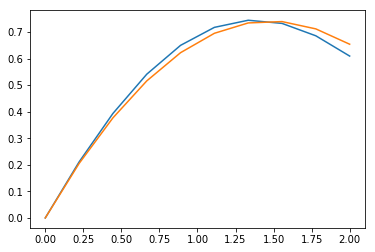

In [8]:
print(loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()

[array([[-22.35099166, -11.22651911, -12.10835581,  -1.20790237,
          2.42002418,   3.26681164,  -6.89869373,  29.65592656,
         -2.76470772,  20.2562033 ]]), array([[23.88932648],
       [13.5355559 ],
       [28.19403353],
       [24.57789866],
       [24.12064413],
       [33.08449933],
       [15.3381369 ],
       [19.71170484],
       [30.18900178],
       [22.01865682]])]
[array([[-3.38006441, -1.81868976, -2.13113823, -0.2134834 ,  0.33526637,
         0.73880944, -1.07319027,  4.21154093, -0.56060888,  2.9078938 ]]), array([[4.6192324 ],
       [3.098053  ],
       [5.31679162],
       [4.72416876],
       [4.65501192],
       [6.28302593],
       [3.37531563],
       [4.02075805],
       [5.67749078],
       [4.34925173]])]
[array([[-0.11813615, -0.17825085, -0.37942104, -0.0119718 ,  0.01380836,
         0.2894796 , -0.04968379, -0.0479356 , -0.1488699 ,  0.01365873]]), array([[1.04541447],
       [1.01808365],
       [1.11737842],
       [1.05054244],
       [1.0473

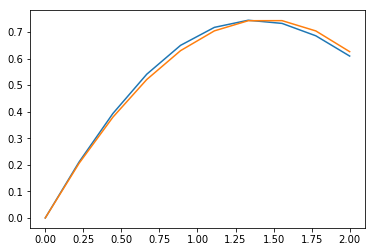

In [10]:
nx = 10
dx = 1. / nx

def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return -1./5. * np.exp(-x/5.) * np.cos(x) - 1./5. * dpsy - psy


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return np.exp(-x/5.) * np.sin(x)


x_space = np.linspace(0, 2, nx)    
y_space = psy_analytic(x_space)


def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy_trial(xi, net_out):
    return xi + xi**2 * net_out

psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)


def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum


W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad =  grad(loss_function)(W, x_space)
    if i%10 == 0: print(loss_grad)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]


print(loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()